Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.





In [6]:
# importing numpy library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Linear Regression

In [4]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # number of training examples & number of features
    self.m, self.n = X.shape # number of rows & columns

    # initiating the weight & bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)

    # calculating gradients
    dw = - (2 * np.sum((self.X.T).dot(self.Y - Y_prediction))) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, X):
    return X.dot(self.w) + self.b

Using Linear Regression model for prediction

Data Processing

In [7]:
# loading the data from csv file to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [8]:
# printing the first 5 rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
# number of rows & columns in the dataset
salary_data.shape

(30, 2)

In [10]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & target

In [14]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [15]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [16]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data to training data & Test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,random_state = 2 )

Train the Logistic Regression Model

In [20]:
model = Linear_Regression(learning_rate = 0.01, no_of_iterations = 1000)

In [21]:
model.fit(X_train, Y_train)

In [25]:
# print the parameters

print('weight = ', model.w)
print('bias = ', model.b)

weight =  [9580.3011966]
bias =  23226.38946603212


Predict the salary value for test data

In [26]:
test_data_prediction = model.predict(X_test)

In [27]:
print(test_data_prediction)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


Visualizing the predicted values and actual values

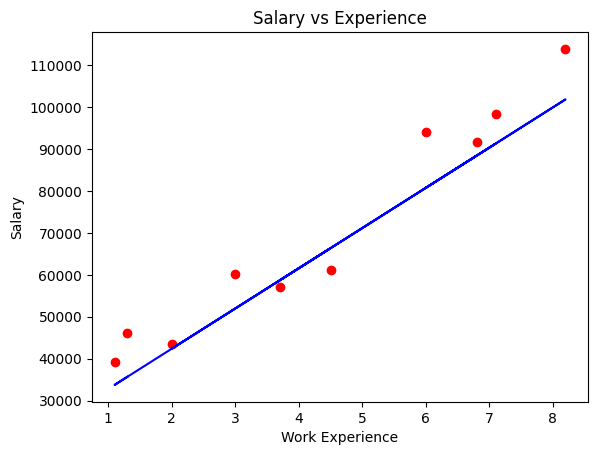

In [28]:
plt.scatter( X_test, Y_test, color = 'red' )
plt.plot( X_test, test_data_prediction, color = 'blue' )
plt.xlabel( 'Work Experience' )
plt.ylabel( 'Salary' )
plt.title( 'Salary vs Experience' )
plt.show()